420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2021 - Spécialisation technique en Intelligence Artificielle - Mikaël Swawola, M.Sc.
<br/>
![Démonstration](static/02-demo-banner.png)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [2]:
# Manipulation de données
import numpy as np

# Visualisation de données
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(8.7,6.27)})

### 1 - Simulation d'un jeu de données

In [4]:
m = 5

In [5]:
np.random.seed(2020) # Pour la reproductibilité des résultats
theta_0 = 1
theta_1 = 2
x = np.linspace(1,m,m)
y = theta_0 + (theta_1 * x) + np.random.randint(-2,2,m)

Text(0, 0.5, 'y')

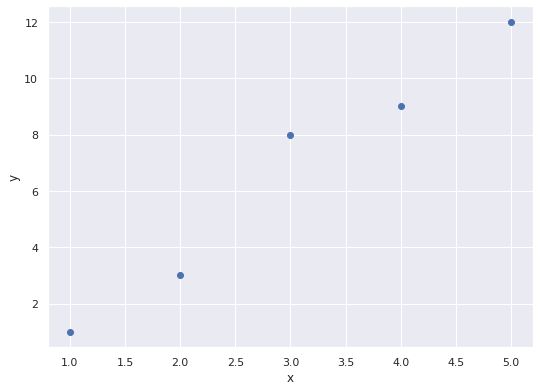

In [6]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")

In [7]:
def hypothesis(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

In [8]:
y_hat = hypothesis(x, theta_0, theta_1)

In [9]:
print(f'x = {x}')
print(f'y_hat = {y_hat}')

x = [1. 2. 3. 4. 5.]
y_hat = [ 3.  5.  7.  9. 11.]


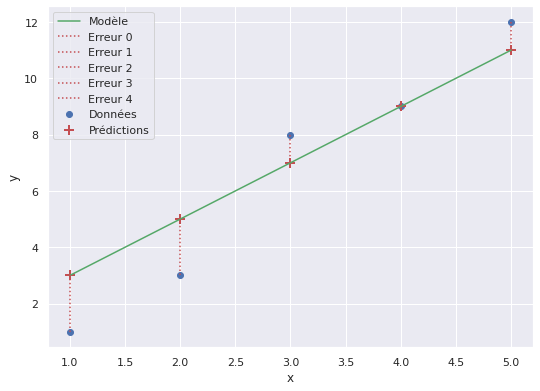

In [10]:
fig, ax = plt.subplots()
ax.scatter(x,y, label="Données")
ax.plot(x, theta_0 + (theta_1 * x), color="g", label='Modèle')
ax.scatter(x, y_hat, color="r", marker="+", s=92, linewidth=2, label="Prédictions")

for i,line in enumerate(x):
    ax.plot([x[i], x[i]] ,[y[i], y_hat[i]], linestyle=":", color = "r", label=f"Erreur {i}")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc='upper left')

### 2 - Décomposition du calcul de l'erreur quadratique moyenne

$J(\theta_{0},\theta_{1})= \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$

In [11]:
print(f'y = {y}')
print(f'y_hat = {y_hat}')

y = [ 1.  3.  8.  9. 12.]
y_hat = [ 3.  5.  7.  9. 11.]


In [12]:
error = y_hat - y
error

array([ 2.,  2., -1.,  0., -1.])

In [13]:
squared_error = (y_hat - y)**2
squared_error

array([4., 4., 1., 0., 1.])

In [14]:
sse = np.sum((y_hat - y)**2)
sse

10.0

In [15]:
mse = np.sum((y_hat - y)**2) / m
mse

2.0

In [16]:
print(f'Erreur quadratique moyenne (version vectorisée) = {mse}')

Erreur quadratique moyenne (version vectorisée) = 2.0


In [17]:
#%%timeit
np.sqrt(np.sum((y_hat - y)**2) / m)

1.4142135623730951

### 3 - Calcul de l'erreur quadratique moyenne à l'aide d'une boucle for

In [18]:
#%%timeit
sse = 0
for i, _ in enumerate(x):
    y_hat = hypothesis(x[i], theta_0, theta_1)
    diff_squared = (y_hat - y[i])**2
    sse = sse + diff_squared
mse = sse / m

In [19]:
print(f'Erreur quadratique moyenne (boucle for) = {mse}')

Erreur quadratique moyenne (boucle for) = 2.0


In [20]:
np.sqrt(mse)

1.4142135623730951

In [ ]:
# Calculer rapport des mesures de temps d'exécution